# Capstone Assignment 4 - Cell Nuclei Semantic Segmentation: A Deep Learning Approach for Image Analysis

## 1. Import Packages

In [197]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob, os

## 2. Data Preparation

### Data Loading

In [198]:
filepath_train = r"C:\Users\Farah\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\train"
images_train = []
masks_train = []

In [199]:
#Load input images for train dataset
image_path = os.path.join(filepath_train,'inputs')
for img in os.listdir(image_path):
    #Get the full path of the image file
    full_path = os.path.join(image_path,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images_train.append(img_np)

In [200]:
#Load masking images for train dataset
mask_path = os.path.join(filepath_train,'masks')
for mask in os.listdir(mask_path):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks_train.append(mask_np)

In [201]:
filepath_test = r"C:\Users\Farah\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\test"
images_test = []
masks_test = []

In [202]:
#Load input images for test dataset
image_path = os.path.join(filepath_test,'inputs')
for img in os.listdir(image_path):
    #Get the full path of the image file
    full_path = os.path.join(image_path,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images_test.append(img_np)

In [203]:
#Load masking images for test dataset
mask_path = os.path.join(filepath_test,'masks')
for mask in os.listdir(mask_path):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks_test.append(mask_np)

In [204]:
print(len(images_train))
print(len(masks_train))
print(len(images_test))
print(len(masks_test))

603
603
67
67


## 3. Data Preprocessing

In [205]:
#Convert the list of np array into a full np array
images_train_np = np.array(images_train)
masks_train_np = np.array(masks_train)

images_test_np = np.array(images_test)
masks_test_np = np.array(masks_test)

In [206]:
#for training
#Expand the mask dimension to include the channel axis
masks_np_train_exp = np.expand_dims(masks_train_np,axis=-1)
#Convert the mask value into just 0 and 1
converted_masks_train_np = np.round(masks_np_train_exp/255)
#Normalize the images pixel value
normalized_images_train_np = images_train_np/255.0

#for testing
#Expand the mask dimension to include the channel axis
masks_np_test_exp = np.expand_dims(masks_test_np,axis=-1)
#Convert the mask value into just 0 and 1
converted_masks_test_np = np.round(masks_np_test_exp/255)
#Normalize the images pixel value
normalized_images_test_np = images_test_np/255.0

In [207]:
X_train= normalized_images_train_np
X_test= normalized_images_test_np
y_train= converted_masks_train_np
y_test= converted_masks_test_np

In [208]:
import tensorflow as tf

desired_shape = (128, 128)  # Desired shape for the images

# Reshape X_train
resized_X_train = []
for image in X_train:
    resized_image = tf.image.resize(image, desired_shape)
    resized_X_train.append(resized_image)
resized_X_train = tf.convert_to_tensor(resized_X_train)

# Reshape X_test
resized_X_test = []
for image in X_test:
    resized_image = tf.image.resize(image, desired_shape)
    resized_X_test.append(resized_image)
resized_X_test = tf.convert_to_tensor(resized_X_test)

# Reshape y_train
resized_y_train = []
for image in y_train:
    resized_image = tf.image.resize(image, desired_shape)
    resized_y_train.append(resized_image)
resized_y_train = tf.convert_to_tensor(resized_y_train)

# Reshape y_test
resized_y_test = []
for image in y_test:
    resized_image = tf.image.resize(image, desired_shape)
    resized_y_test.append(resized_image)
resized_y_test = tf.convert_to_tensor(resized_y_test)

In [209]:
# Combine features and labels together to form a dataset
# Training dataset
train = tf.data.Dataset.from_tensor_slices((resized_X_train, resized_y_train))
# Testing dataset
test = tf.data.Dataset.from_tensor_slices((resized_X_test, resized_y_test))

In [210]:
TRAIN_LENGTH = len(resized_X_train)
BATCH_SIZE = 16
BUFFER_SIZE = 600
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

# Prepare the training dataset
train_images = tf.data.Dataset.from_tensor_slices((resized_X_train, resized_y_train))
train_images = train_images.shuffle(TRAIN_LENGTH)
train_images = train_images.batch(BATCH_SIZE)
train_images = train_images.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Prepare the testing dataset
test_images = tf.data.Dataset.from_tensor_slices((resized_X_test, resized_y_test))
test_images = test_images.batch(BATCH_SIZE)
test_images = test_images.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [211]:
sample_image = resized_X_train[0]
sample_mask = resized_y_train[0]

In [212]:
for image,mask in train_images.take(1):
    print(image.shape)
    print(mask.shape)

(16, 128, 128, 3)
(16, 128, 128, 1)


In [213]:
# Create a data augmentation layer through creating a custom class
import tensorflow.keras as keras
class Augment(keras.layers.Layer):
    def __init__(self,seed=42):
        super().__init__()
        self.augment_inputs = keras.layers.RandomFlip(mode='horizontal',seed=seed)
        self.augment_labels = keras.layers.RandomFlip(mode='horizontal',seed=seed)

    def call(self,inputs,labels):
        inputs = self.augment_inputs(inputs)
        labels = self.augment_labels(labels)
        return inputs,labels

In [214]:
# Define the augmentation function
def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images[0])
    labels = tf.image.random_flip_left_right(labels[0])
    return images, labels

# Build the dataset with augmentation and repeat it
# Shuffle and batch the training dataset
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(augment_data)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)
# Batch the testing dataset
test_batches = test_images.batch(BATCH_SIZE)

In [215]:
# Inspect some data
def display(display_list):
    plt.figure(figsize=(15,15))
    title = ["Input Image","True Mask","Predicted Mask"]
    for i in range(len(display_list)):
        plt.subplot(1,len(display_list),i+1)
        plt.title(title[i])
        plt.imshow(keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

## 4. Model Development

The plan is to apply transfer learning by using a pretrained model as the feature extractor.
Then, will proceed to build our own upsampling path with the tensorflow_example module we just imported + other default keras layers.

In [216]:
#4.1. Use a pretrained model as feature extractor
from tensorflow import keras
base_model = keras.applications.MobileNetV2(input_shape=[128,128,3],include_top=False)
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_15[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [217]:
#4.2. Specify the layers that we need as outputs for the feature extractor
layer_names = [
    "block_1_expand_relu",      #64x64
    "block_3_expand_relu",      #32x32
    "block_6_expand_relu",      #16x16
    "block_13_expand_relu",     #8x8
    "block_16_project"          #4x4
]

base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

#4.3. Instantiate the feature extractor
down_stack = keras.Model(inputs=base_model.input,outputs=base_model_outputs)
down_stack.trainable = False

#4.4. Define the upsampling path
up_stack = [
    pix2pix.upsample(512,3),        #4x4  --> 8x8
    pix2pix.upsample(256,3),        #8x8  --> 16x16
    pix2pix.upsample(128,3),        #16x16 --> 32x32
    pix2pix.upsample(64,3)          #32x32 --> 64x64
]

#4.5. Define a function for the unet creation.
def unet(output_channels:int):
    """
    We are going to use functional API to connect the downstack and upstack properly
    """
    #(A) Input layer
    inputs = keras.Input(shape=[128,128,3])
    #(B) Down stack (Feature extractor)
    skips = down_stack(inputs)
    x = skips[-1]       #This is the output that will progress until the end of the model
    skips = reversed(skips[:-1])

    #(C) Build the upsampling path
    """
    1. Let the final output from the down stack flow through the up stack
    2. Concatenate the output properly by following the structure of the U-Net
    """
    for up,skip in zip(up_stack,skips):
        x = up(x)
        concat = keras.layers.Concatenate()
        x = concat([x,skip])

    #(D) Use a transpose convolution layer to perform one last upsampling. This convolution layer will become the output layer as well.
    last = keras.layers.Conv2DTranspose(output_channels,kernel_size=3,strides=2,padding='same')     #64x64 --> 128x128
    outputs = last(x)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

In [218]:
#4.6. Create the U-Net model by using the function
OUTPUT_CLASSES = 2
model = unet(OUTPUT_CLASSES)
model.summary()
keras.utils.plot_model(model)

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_13 (Functional)          [(None, 64, 64, 96)  1841984     ['input_16[0][0]']               
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                         

In [219]:
# Compile the model
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

1/1 [==============================] - 3s 3s/step


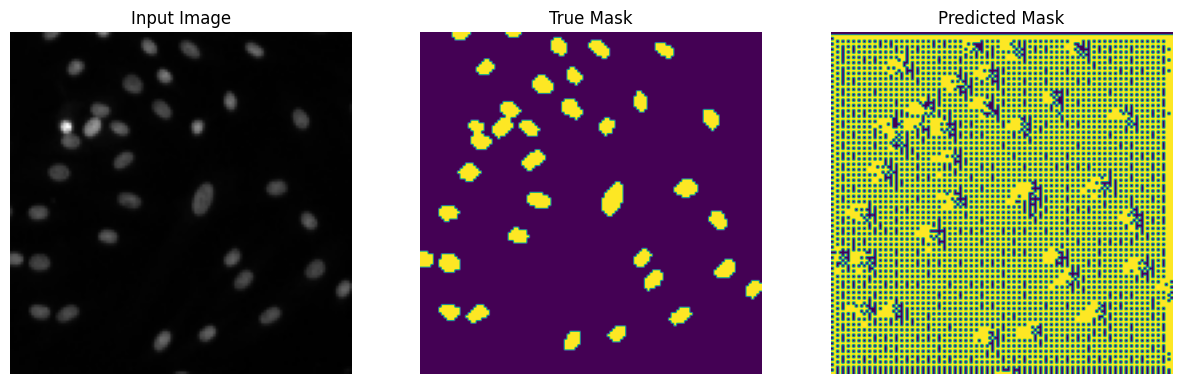

In [220]:
# Create functions to show predictions
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]       #equivalent to tf.expand_dims()
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    if dataset:
        for image,mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0],mask[0],create_mask(pred_mask)])
    else:
        display([sample_image,sample_mask,create_mask(model.predict(sample_image[tf.newaxis,...]))])

show_predictions()

In [221]:
# Create a custom callback function to display results during model training
class DisplayCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        # clear_output(wait=True)
        show_predictions()
        print('\nSample prediction after epoch #{}\n'.format(epoch+1))

In [222]:
# Create a TensorBoard callback object for the usage of TensorBoard
import tensorflow as tf
import datetime
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import TensorBoard
base_log_path = r"tensorboard-log\capstone-4"
log_path = os.path.join(base_log_path,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = callbacks.TensorBoard(log_path)

Epoch 1/10
1/1 [==============================] - 0s 192ms/steposs: 0.0982 - accuracy: 0.95


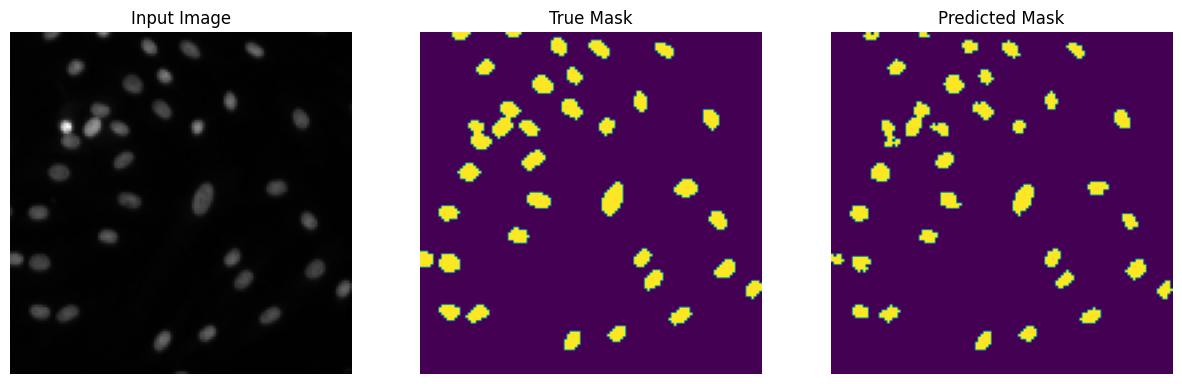


Sample prediction after epoch #1

37/37 [==============================] - 191s 5s/step - loss: 0.0982 - accuracy: 0.9597
Epoch 2/10
1/1 [==============================] - 0s 184ms/steposs: 0.0920 - accuracy: 0.96


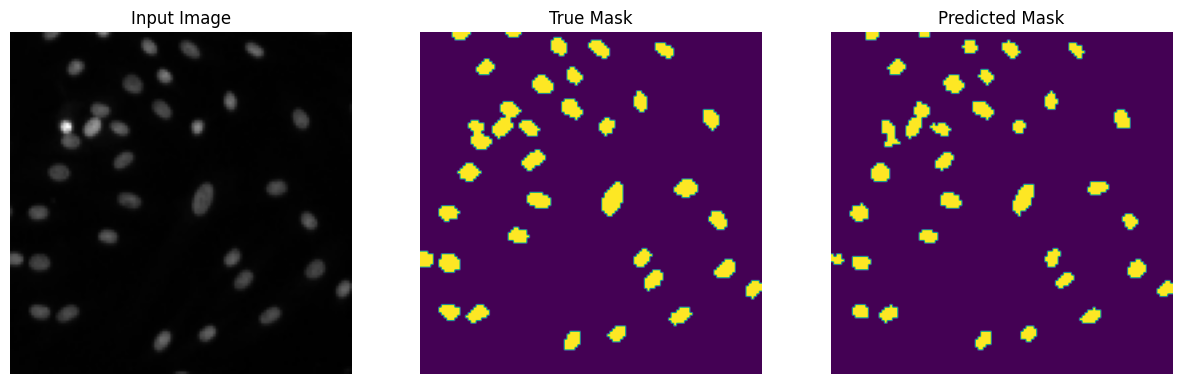


Sample prediction after epoch #2

37/37 [==============================] - 183s 5s/step - loss: 0.0920 - accuracy: 0.9624
Epoch 3/10
1/1 [==============================] - 0s 168ms/steposs: 0.0901 - accuracy: 0.96


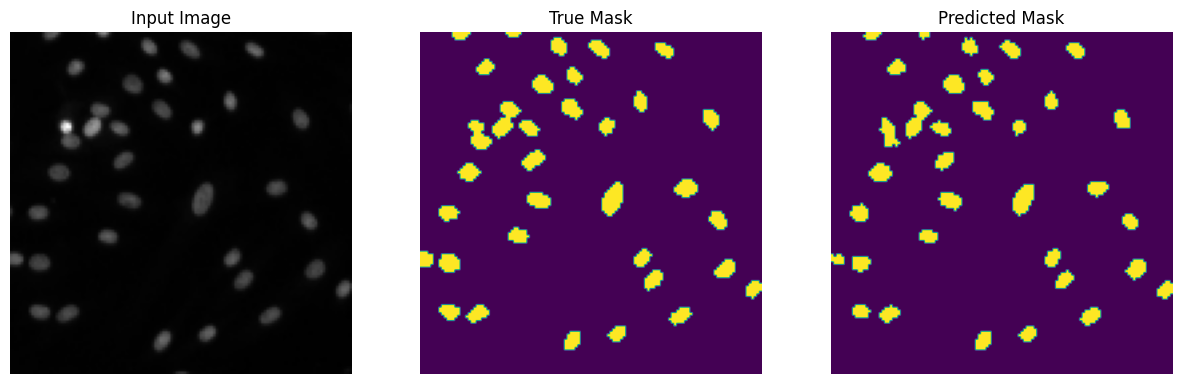


Sample prediction after epoch #3

37/37 [==============================] - 195s 5s/step - loss: 0.0901 - accuracy: 0.9632
Epoch 4/10
1/1 [==============================] - 0s 159ms/steposs: 0.0859 - accuracy: 0.96


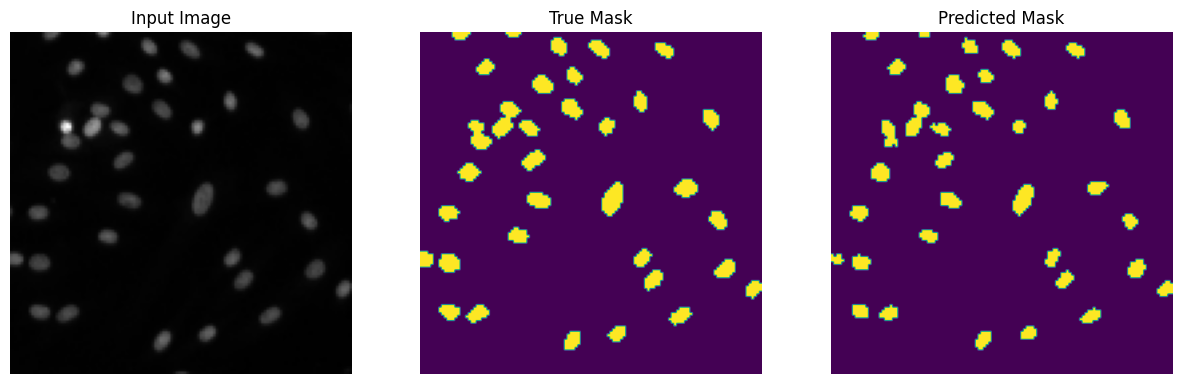


Sample prediction after epoch #4

37/37 [==============================] - 196s 5s/step - loss: 0.0859 - accuracy: 0.9650
Epoch 5/10
1/1 [==============================] - 0s 230ms/steposs: 0.0828 - accuracy: 0.96


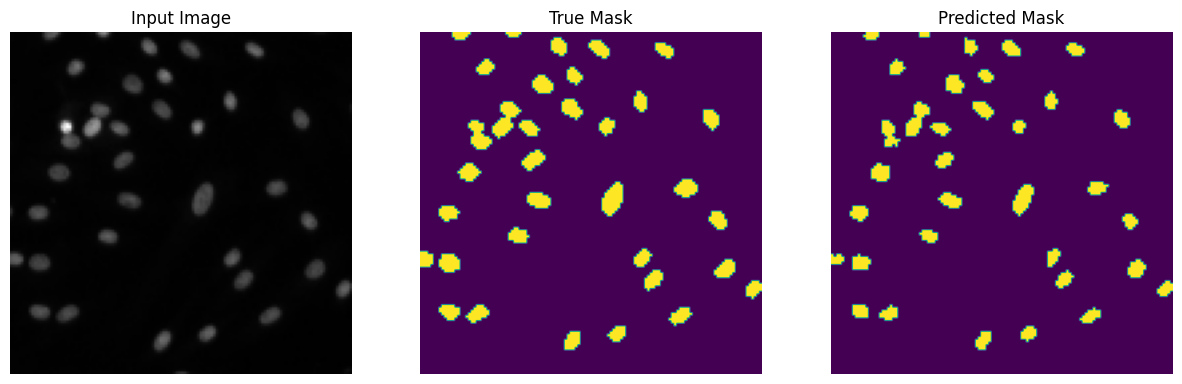


Sample prediction after epoch #5

37/37 [==============================] - 224s 6s/step - loss: 0.0828 - accuracy: 0.9661
Epoch 6/10
1/1 [==============================] - 0s 150ms/steposs: 0.0816 - accuracy: 0.96


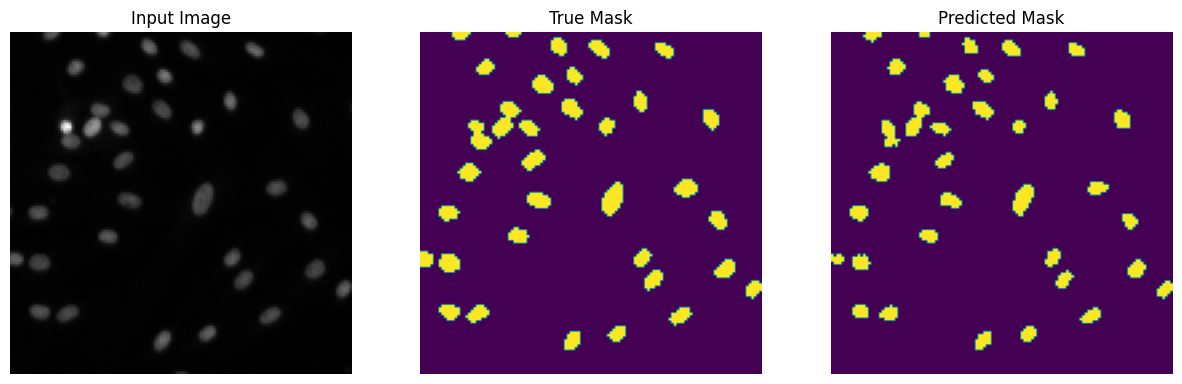


Sample prediction after epoch #6

37/37 [==============================] - 192s 5s/step - loss: 0.0816 - accuracy: 0.9667
Epoch 7/10
1/1 [==============================] - 0s 157ms/steposs: 0.0798 - accuracy: 0.96


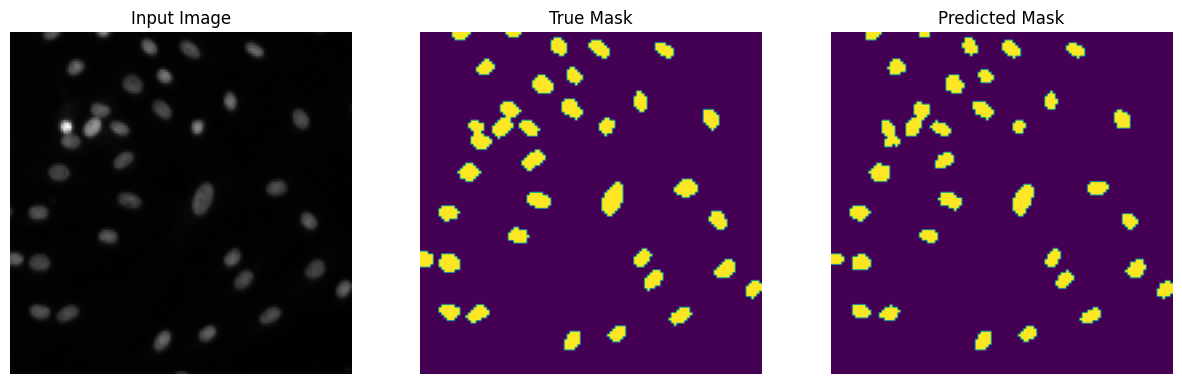


Sample prediction after epoch #7

37/37 [==============================] - 225s 6s/step - loss: 0.0798 - accuracy: 0.9673
Epoch 8/10
1/1 [==============================] - 0s 307ms/steposs: 0.0782 - accuracy: 0.96


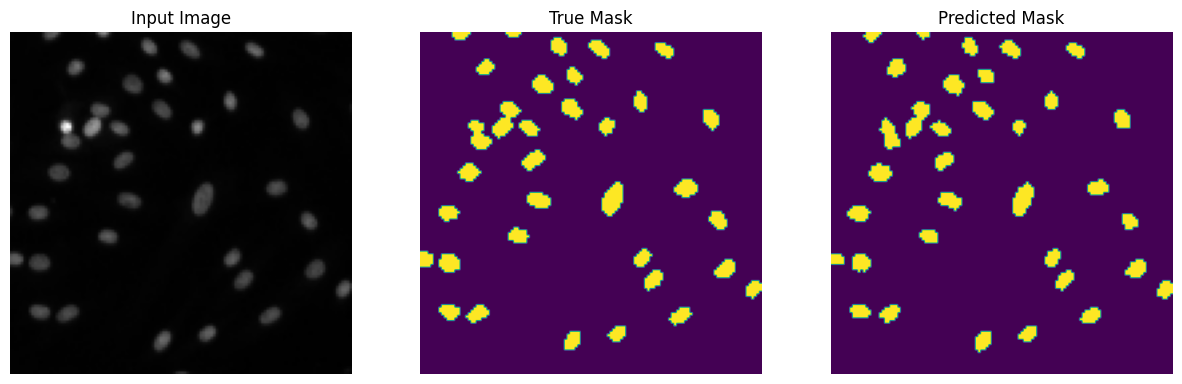


Sample prediction after epoch #8

37/37 [==============================] - 210s 6s/step - loss: 0.0782 - accuracy: 0.9679
Epoch 9/10
1/1 [==============================] - 0s 244ms/steposs: 0.0756 - accuracy: 0.96


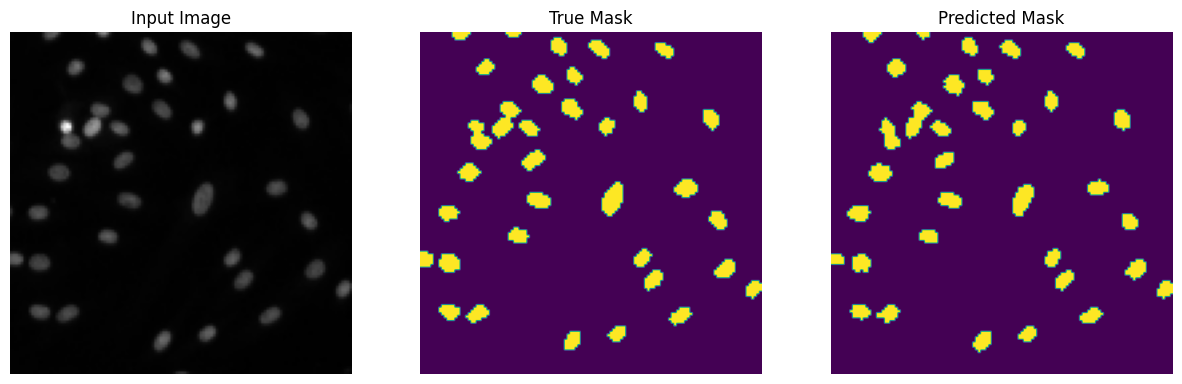


Sample prediction after epoch #9

37/37 [==============================] - 234s 6s/step - loss: 0.0756 - accuracy: 0.9690
Epoch 10/10
1/1 [==============================] - 0s 190ms/steposs: 0.0748 - accuracy: 0.96


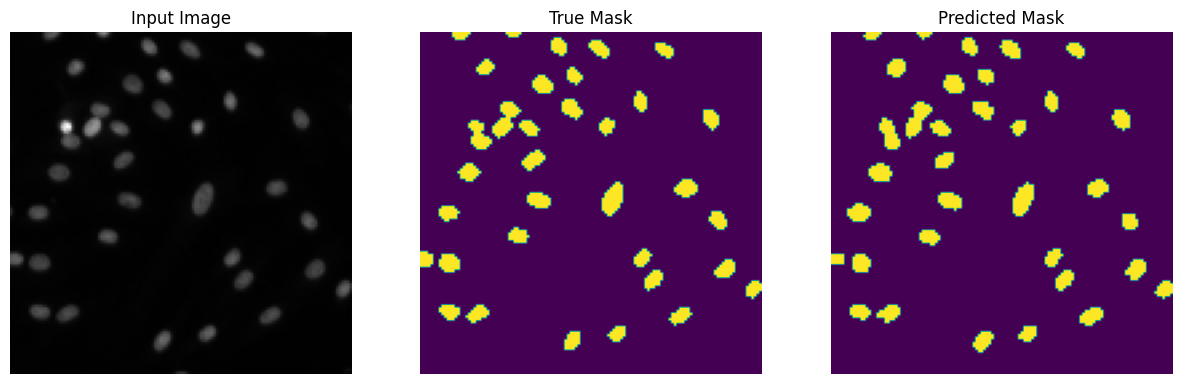


Sample prediction after epoch #10

37/37 [==============================] - 235s 6s/step - loss: 0.0748 - accuracy: 0.9694


In [224]:
# Create TensorFlow datasets
train_batches = tf.data.Dataset.from_tensor_slices((resized_X_train, resized_y_train)).repeat().batch(BATCH_SIZE)
test_batches = tf.data.Dataset.from_tensor_slices((resized_X_test, resized_y_test)).batch(BATCH_SIZE)

VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(resized_X_test) // BATCH_SIZE // VAL_SUBSPLITS
# Calculate the steps per epoch
STEPS_PER_EPOCH = len(resized_X_train) // BATCH_SIZE

# Train the model
history = model.fit(train_batches, validation_data=test_batches, validation_steps=VALIDATION_STEPS,
                    epochs=10, steps_per_epoch=STEPS_PER_EPOCH, callbacks=[tb, DisplayCallback()])

## 5. Model Evaluation

In [225]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [226]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_batches)

# Print the computed metrics
print("Loss: {:.4f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))

5/5 [==============================] - 20s 3s/step - loss: 0.0899 - accuracy: 0.9632
Loss: 0.0899
Accuracy: 96.32%


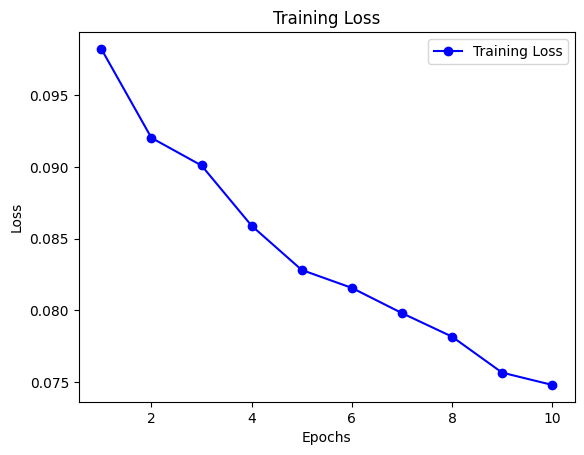

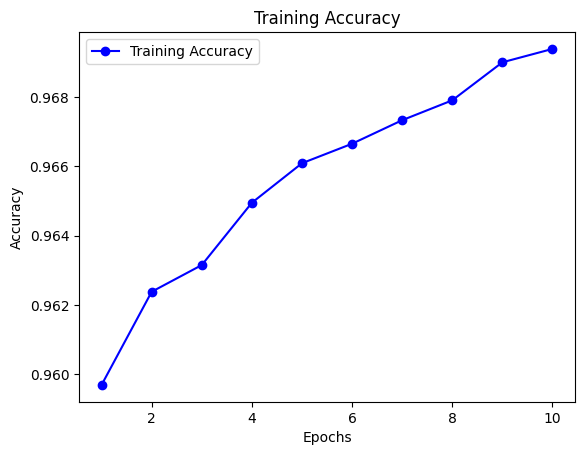

In [228]:
import matplotlib.pyplot as plt

# Get the training metrics from the history object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# Plot the learning curves
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5. Model Deployment

1/1 [==============================] - 3s 3s/step


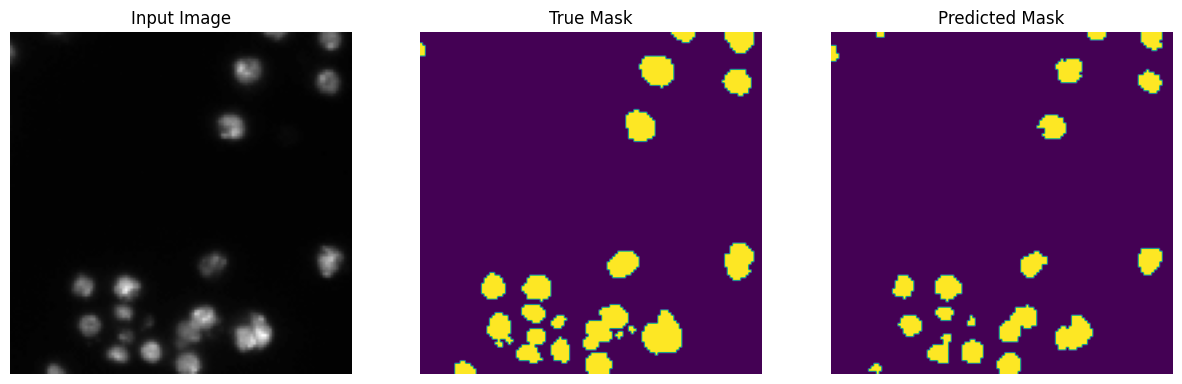

1/1 [==============================] - 2s 2s/step


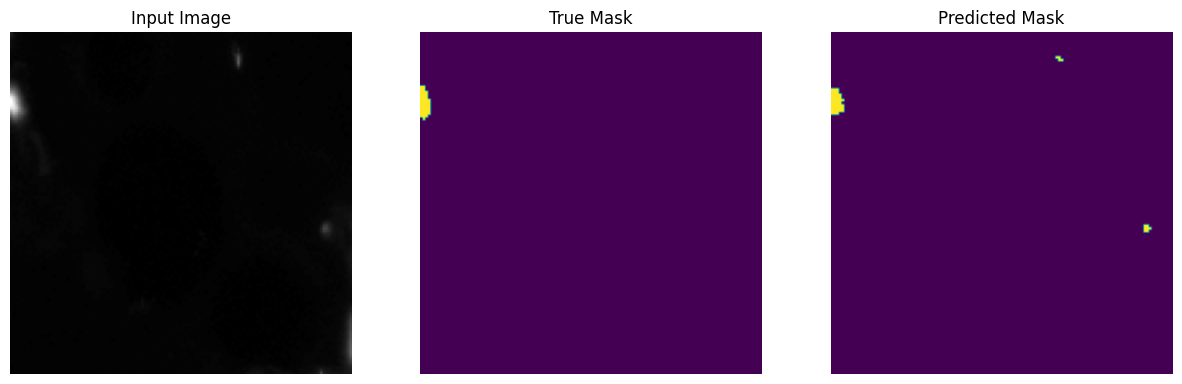

1/1 [==============================] - 2s 2s/step


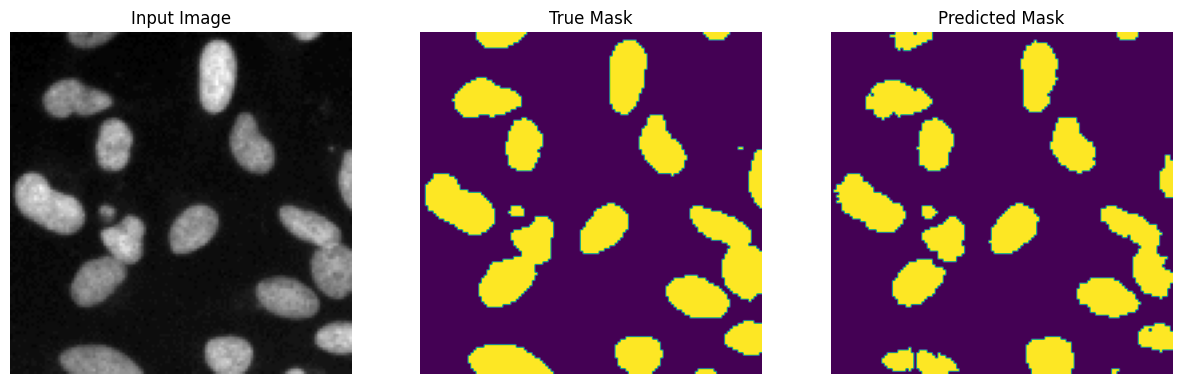

In [153]:
show_predictions(test_images,3)

## 6. Saved the Model

In [229]:
PATH = os.getcwd()
print(PATH)

c:\Users\Farah\Desktop\HANDS-ON\deep_learning_computer_vision\image-segmentation\capstone_4


In [230]:
# Model save path
model_save_path = os.path.join(PATH,"saved_models")
keras.models.save_model(model,model_save_path)

INFO:tensorflow:Assets written to: c:\Users\Farah\Desktop\HANDS-ON\deep_learning_computer_vision\image-segmentation\capstone_4\saved_models\assets


INFO:tensorflow:Assets written to: c:\Users\Farah\Desktop\HANDS-ON\deep_learning_computer_vision\image-segmentation\capstone_4\saved_models\assets


In [231]:
# Check if the model can be loaded
model_loaded = keras.models.load_model(model_save_path)

In [232]:
# Create the folder if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

# Save the model in .h5 format
model_path = os.path.join(model_save_path, 'model.h5')
model.save(model_path)

In [233]:
import pickle

# Save the model architecture as a JSON string
model_architecture = model.to_json()
architecture_path = os.path.join(model_save_path, 'model_architecture.pkl')
with open(architecture_path, 'wb') as file:
    pickle.dump(model_architecture, file)

# Save the model weights
weights_path = os.path.join(model_save_path, 'model_weights.pkl')
model.save_weights(weights_path)